In [33]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [35]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [40]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [42]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)
 

In [44]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [46]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station


In [48]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [58]:
# Find the most recent date in the data set.
last_date = session.query(func.max(Measurement.date)).scalar()
last_date

'2017-08-23'

In [72]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

# Calculate the date one year from the last date in data set.

one_year_ago = (pd.to_datetime(last_date) - pd.DateOffset(years=1)).strftime('%Y-%m-%d')
one_year_ago

'2016-08-23'

In [94]:
# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= one_year_ago)\
    .order_by(Measurement.date).all()
results

[('2016-08-23', 0.0),
 ('2016-08-23', 3.8),
 ('2016-08-23', 1.3),
 ('2016-08-23', None),
 ('2016-08-23', 0.5),
 ('2016-08-23', 45.5),
 ('2016-08-23', 17.8),
 ('2016-08-24', 2.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 57.9),
 ('2016-08-24', None),
 ('2016-08-24', 31.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 36.8),
 ('2016-08-25', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 5.3),
 ('2016-08-25', 1.5),
 ('2016-08-25', 2.8),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.8),
 ('2016-08-26', 0.5),
 ('2016-08-26', 1.0),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.3),
 ('2016-08-27', 0.0),
 ('2016-08-27', 4.6),
 ('2016-08-27', 0.5),
 ('2016-08-27', 0.0),
 ('2016-08-27', 3.0),
 ('2016-08-27', None),
 ('2016-08-28', 0.3),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 15.2),
 ('2016-08-28', 52.6),
 ('2016-08-29', 0.0),
 ('2016-08-29', 4.3),
 ('2016-08-29', 1.0),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 8.9

In [96]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date

df = pd.DataFrame(results, columns=['Date', 'Precipitation'])
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df

,Date,Precipitation
0,2016-08-23,0.0
1,2016-08-23,3.8
2,2016-08-23,1.3
3,2016-08-23,NaN
4,2016-08-23,0.5
...,...,...
2225,2017-08-22,12.7
2228,2017-08-23,2.0
2226,2017-08-23,0.0
2227,2017-08-23,0.0


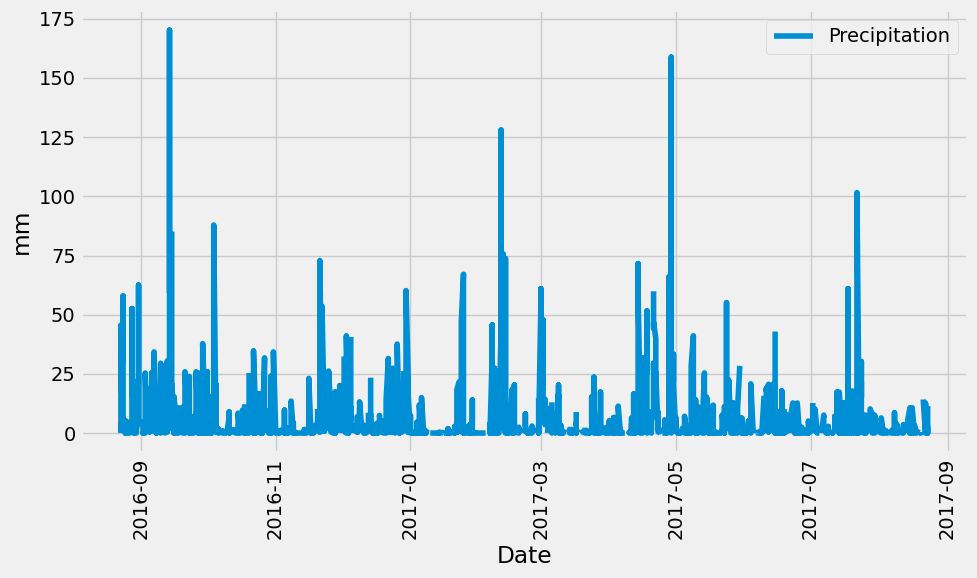

In [98]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Precipitation'], label='Precipitation')
plt.xlabel('Date')
plt.ylabel('mm')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [104]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = df['Precipitation'].describe().to_frame()

summary_statistics

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [106]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
total_stations

9

In [130]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [150]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature_stats = session.query(func.min(Measurement.tobs).label('min_temp'),
                                  func.max(Measurement.tobs).label('max_temp'),
                                  func.avg(Measurement.tobs).label('avg_temp'))\
    .filter(Measurement.station == "USC00519281")\
    .first()

temperature_stats = [(temperature_stats.min_temp, temperature_stats.max_temp, temperature_stats.avg_temp)]
print(temperature_stats)

[(12.2, 29.4, 22.03582251082252)]


In [152]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.station == "USC00519281")\
    .filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame
df_temperature = pd.DataFrame(temperature_data, columns=['Date', 'Temperature'])
df_temperature

,Date,Temperature
0,2016-08-23,25.0
1,2016-08-24,25.0
2,2016-08-25,26.7
3,2016-08-26,26.7
4,2016-08-27,23.9
...,...,...
347,2017-08-14,25.0
348,2017-08-15,25.0
349,2017-08-16,24.4
350,2017-08-17,24.4


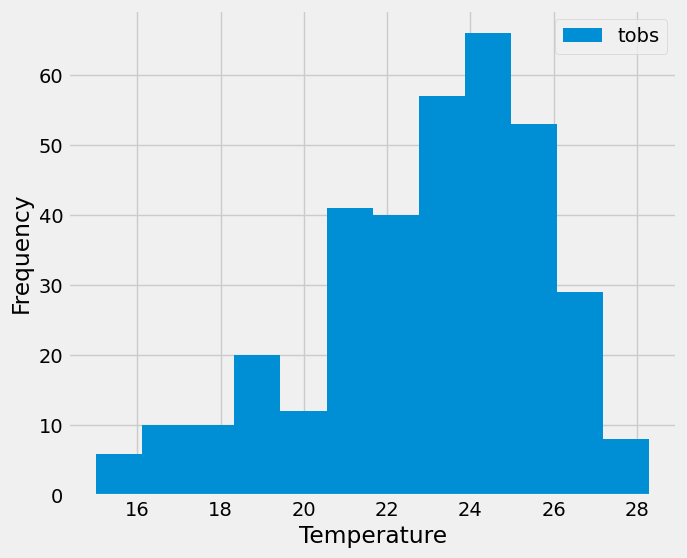

In [164]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.figure(figsize=(7, 6))
plt.hist(df_temperature['Temperature'], bins=12,label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Close Session

In [166]:
# Close Session
session.close()
